In [1]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import sys,pickle,glob
from tqdm import tqdm_notebook as tq
from IPython.display import display
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
from collections import Counter
from IPython.core.display import display
#from pathos import multiprocessing as mp

from matplotlib import pyplot as plt
#import seaborn
#colors = seaborn.color_palette()
xr_full = range(1991,2016)
xr = range(1992,2016)
%matplotlib inline
#import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

In [2]:
all_cats = ['Environmental Sciences', 'Chemistry, Analytical', 'Oncology','Psychology, Developmental','Hospitality, Leisure, Sport & Tourism','Chemistry, Multidisciplinary', 'Astronomy & Astrophysics','Biotechnology & Applied Microbiology', 'Chemistry, Organic','Pharmacology & Pharmacy', 'Virology','Cardiac & Cardiovascular Systems', 'Ophthalmology','Marine & Freshwater Biology', 'Chemistry, Physical','Biochemistry & Molecular Biology', 'Clinical Neurology','Dermatology', 'Surgery', 'Physics, Multidisciplinary','Medical Laboratory Technology', 'Multidisciplinary Sciences','Nuclear Science & Technology', 'Medicine, General & Internal','Materials Science, Multidisciplinary', 'Engineering, Chemical','Computer Science, Information Systems', 'Mathematics','Medicine, Research & Experimental', 'Biodiversity Conservation','Urology & Nephrology', 'Dentistry, Oral Surgery & Medicine','Fisheries', 'Geochemistry & Geophysics', 'Physics, Mathematical','Veterinary Sciences', 'Physics, Atomic, Molecular & Chemical','Engineering, Environmental', 'Polymer Science', 'Plant Sciences','Chemistry, Inorganic & Nuclear', 'Engineering, Biomedical','Meteorology & Atmospheric Sciences', 'Endocrinology & Metabolism','Psychology, Multidisciplinary', 'Mathematics, Applied','Physics, Condensed Matter', 'Immunology', 'Cell Biology','Microbiology', 'Electrochemistry', 'Neurosciences', 'Acoustics','Public, Environmental & Occupational Health','Computer Science, Theory & Methods', 'Otorhinolaryngology','Genetics & Heredity', 'Physiology', 'Paleontology', 'Optics','Zoology', 'Agronomy', 'Psychology, Clinical', 'Mineralogy','Rehabilitation', 'Engineering, Mechanical','Statistics & Probability', 'Critical Care Medicine','Nutrition & Dietetics', 'Pathology', 'Ecology', 'Allergy','Biochemical Research Methods', 'Rheumatology','Metallurgy & Metallurgical Engineering', 'Physics, Applied','Economics', 'Crystallography', 'Materials Science, Ceramics','Psychology, Experimental', 'Pediatrics','Agricultural Engineering','Radiology, Nuclear Medicine & Medical Imaging','Gastroenterology & Hepatology', 'Education & Educational Research','Engineering, Aerospace', 'Physics, Particles & Fields','Behavioral Sciences', 'Agriculture, Multidisciplinary','Engineering, Electrical & Electronic','Peripheral Vascular Disease', 'Food Science & Technology','Mechanics', 'Anesthesiology', 'Engineering, Multidisciplinary','Business, Finance', 'Hematology', 'Computer Science, Cybernetics','Business', 'Computer Science, Interdisciplinary Applications','Infectious Diseases', 'Geography', 'Andrology','Instruments & Instrumentation', 'Psychology, Biological','Gerontology', 'Thermodynamics','Education, Scientific Disciplines', 'Entomology', 'Family Studies','Agriculture, Dairy & Animal Science', 'Developmental Biology','Psychology, Educational', 'Oceanography', 'Parasitology','Spectroscopy', 'Biophysics', 'Anatomy & Morphology','Chemistry, Applied', 'Computer Science, Software Engineering','Obstetrics & Gynecology', 'Nursing', 'Substance Abuse','Psychology', 'Mathematical & Computational Biology','Audiology & Speech-Language Pathology', 'Psychology, Social','Medicine, Legal', 'Geosciences, Multidisciplinary', 'Orthopedics','Political Science', 'Psychology, Applied', 'Biology', 'Psychiatry','Chemistry, Medicinal', 'Emergency Medicine', 'Horticulture','Forestry', 'Education, Special', 'Management','Reproductive Biology', 'Physics, Fluids & Plasmas','Physics, Nuclear', 'Ornithology', 'History', "Women's Studies",'Art', 'Computer Science, Hardware & Architecture','Social Sciences, Interdisciplinary','Agricultural Economics & Policy', 'Mycology','Operations Research & Management Science', 'Respiratory System','Soil Science', 'Remote Sensing', 'Ethics', 'Geology', 'Microscopy','Law', 'Automation & Control Systems', 'Psychology, Mathematical','Transplantation', 'Sociology', 'Geriatrics & Gerontology','Literature', 'Toxicology', 'Materials Science, Paper & Wood','Materials Science, Coatings & Films', 'Engineering, Civil','Health Care Sciences & Services','Information Science & Library Science','Materials Science, Composites', 'Sport Sciences','Construction & Building Technology', 'Linguistics', 'Anthropology','Tropical Medicine', 'Computer Science, Artificial Intelligence','Criminology & Penology', 'Demography', 'Geography, Physical','Nanoscience & Nanotechnology', 'Primary Health Care','Social Work', 'Engineering, Geological','Engineering, Manufacturing', 'Environmental Studies', 'Limnology','Communication', 'Health Policy & Services','Language & Linguistics', 'Planning & Development', 'Social Issues','Public Administration','Mathematics, Interdisciplinary Applications','History & Philosophy Of Science', 'Psychology, Psychoanalysis','Water Resources', 'Engineering, Industrial','Energy & Fuels','Materials Science, Characterization & Testing','Engineering, Ocean', 'Materials Science, Textiles', 'Archaeology','Imaging Science & Photographic Technology','Industrial Relations & Labor', 'Classics', 'Philosophy','Social Sciences, Mathematical Methods', 'Robotics', 'Music','Area Studies', 'Telecommunications', 'Engineering, Marine','Literature, American', 'Literature, German, Dutch, Scandinavian','Evolutionary Biology', 'International Relations', 'Ergonomics','Folklore', 'Humanities, Multidisciplinary','Literature, British Isles', 'Religion', 'Film, Radio, Television','Transportation', 'Integrative & Complementary Medicine','Medieval & Renaissance Studies', 'History Of Social Sciences','Literature, Slavic', 'Literature, Romance', 'Ethnic Studies','Architecture', 'Cultural Studies', 'Literary Theory & Criticism','Urban Studies', 'Materials Science, Biomaterials', 'Poetry','Literary Reviews', 'Asian Studies','Literature, African, Australian, Canadian', 'Theater', 'Logic','Mining & Mineral Processing', 'Cell & Tissue Engineering','Transportation Science & Technology', 'Engineering, Petroleum','Dance', 'Social Sciences, Biomedical', 'Medical Informatics','Medical Ethics', 'Neuroimaging']
cat_dict = {cat:i for i,cat in enumerate(sorted(all_cats))}

In [3]:
DATADIR = "/Users/jaredlorince/Desktop/results-v100-n500-t46/"

In [4]:
cat_pubs_by_year = pd.read_pickle('/Users/jaredlorince/Desktop/cat_pubs_by_year.pkl')
cat_pubs_by_year_prop = cat_pubs_by_year.div(cat_pubs_by_year['ALL'],axis=0)
#cat_citations_by_year = pd.read_pickle(DATADIR+'cat_citations_by_year.pkl')
#cat_citations_by_year_prop = cat_citations_by_year.div(cat_citations_by_year['ALL'],axis=0)
#cat_authors_by_year = pd.read_pickle(DATADIR+'cat_authors_by_year.pkl')

In [5]:
citation_arrays = [np.load('/Users/jaredlorince/Desktop/citations/{}.npy'.format(i)) for i in range(1991,2016)]
citation_df = {y:{} for y in range(1991,2016)}
for y,year in zip(citation_arrays,range(1991,2016)):
    for i,cat in enumerate(sorted(all_cats)):
        citation_df[year][cat] = y[:,i].sum()
citation_df = pd.DataFrame(citation_df).T
citation_df['ALL'] = [arr.sum() for arr in citation_arrays]
citation_df = citation_df.div(citation_df['ALL'],0)

In [6]:
def parse_results(fi):
    df =  pd.read_table(fi,header=None,names=['measure','data'],index_col='measure')
    df.data = df.data.apply(lambda x: np.array(x.split(','),dtype=float))
    return df

In [7]:
def citation_plot(cat):
    pass

def growth(cat,window):
    mx = len(cat_pubs_by_year)-(2*window-1)
    result = []
    for i in range(mx):
        a = cat_pubs_by_year[cat][i:i+window].sum()
        aprop = a/cat_pubs_by_year['ALL'][i:i+window].sum()
        b = cat_pubs_by_year[cat][i+window:i+window*2].sum()
        bprop = b/cat_pubs_by_year['ALL'][i+window:i+window*2].sum()
        result.append(np.log(bprop/aprop))    
    return np.array(result)

def ent_plotter(cat,window_size,ax):
    try:
        df = parse_results("{}results_{}_{}".format(DATADIR,window_size,cat))
    except:
        return None
    start = 1991+window_size-.5
    r = np.arange(start,start+len(df.ix['jsd_m'][0]))
    if window_size%2==0:
        r2 = np.arange(1991,1991+len(df.ix['ent_m'][0]))
    else:
        r2 = np.arange(start,start+len(df.ix['ent_m'][0]))
    ax.plot(r2,df.ix['ent_m'][0],label=cat)
    ax.fill_between(r2,df.ix['ent_m'][0]-df.ix['ent_c'][0],df.ix['ent_m'][0]+df.ix['ent_c'][0],alpha=.25)
    xt = np.arange(r[0]-.5,r[-1]+.5,5)
    ax.set_xticks(xt)
    return df.ix['ent_m'][0]

def jsd_plotter(cat,window_size,ax):
    try:
        df = parse_results("{}results_{}_{}".format(DATADIR,window_size,cat))
    except:
        return None
    start = 1991+window_size-.5
    r = np.arange(start,start+len(df.ix['jsd_m'][0]))
    if window_size%2==0:
        r2 = np.arange(1991,1991+len(df.ix['ent_m'][0]))
    else:
        r2 = np.arange(start,start+len(df.ix['ent_m'][0]))
    ax.plot(r,df.ix['jsd_m'][0],label=cat)
    ax.fill_between(r,df.ix['jsd_m'][0]-df.ix['jsd_c'][0],df.ix['jsd_m'][0]+df.ix['jsd_c'][0],alpha=.25)
    #ax.plot(r,df.ix['ent_dif_m'][0],label=r'$\Delta H$ ',color=colors[1])
    #ax.fill_between(r,df.ix['ent_dif_m'][0]-df.ix['ent_dif_c'][0],df.ix['ent_dif_m'][0]+df.ix['ent_dif_c'][0],alpha=.25,color=colors[1])
    ax.set_xticks(np.arange(r[0]-.5,r[-1]+.5,5))
    

In [8]:
from scipy.stats import entropy
def calc_ins(cat,out=True):
    i = cat_dict[cat]
    if out:
        return [arr[i][i]/arr[i].sum() for arr in citation_arrays]
    else:
        return [arr[i][i]/arr[:,i].sum() for arr in citation_arrays]

def citation_entropy(cat,out=True):
    i = cat_dict[cat]
    if out:
        return [entropy(arr[i]/arr[i].sum()) for arr in citation_arrays]
    else:
        return [entropy(arr[:,i]/arr[:,i].sum()) for arr in citation_arrays]
    
combined = []
for cat in all_cats:
    try:
        df = parse_results("{}results_{}_{}".format(DATADIR,1,cat))
        jsds = df.ix['jsd_m'][0]
        ents = df.ix['ent_m'][0]
        jsds = np.pad(jsds,(25-len(jsds),0),mode='constant',constant_values=np.nan)    
        ents = np.pad(ents,(25-len(jsds),0),mode='constant',constant_values=np.nan)
        if len(jsds) != len(ents):
            raise Exception("??")
    except:
        jsds = [np.nan]*25
        ents = [np.nan]*25
    current = pd.DataFrame({'jsd':jsds,'ent':ents})
    current['year'] = [y for y in range(1991,2016)][-1*len(ents):]
    current['cat'] = cat
    current['citations'] = citation_df[cat].values
    current['pubs'] = cat_pubs_by_year_prop[cat].values
    current['insularity_out'] = calc_ins(cat,out=True)
    current['insularity_in'] = calc_ins(cat,out=False)
    current['cHin'] = citation_entropy(cat,out=False)
    current['cHout'] = citation_entropy(cat,out=True)
    combined.append(current)
combined = pd.concat(combined)

/Users/jaredlorince/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars
/Users/jaredlorince/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide
/Users/jaredlorince/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars
/Users/jaredlorince/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide


In [9]:
combined.cHin.describe()

count    6275.000000
mean            -inf
std              NaN
min             -inf
25%         2.676087
50%         3.046335
75%         3.399348
max         4.712135
Name: cHin, dtype: float64

/Users/jaredlorince/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,span=5).mean()
/Users/jaredlorince/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,span=5).mean()


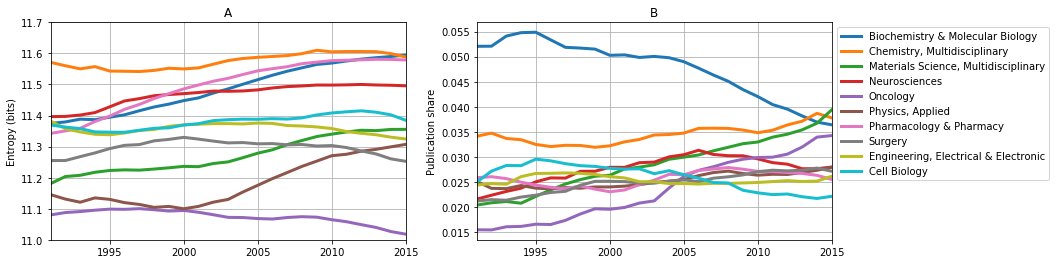

In [77]:
#top_pub_change = combined.groupby('cat').apply(lambda grp: abs(grp.pubs.iloc[-1]-grp.pubs.iloc[0])).sort_values(ascending=False)
from pandas.stats.moments import ewma
biggest = cat_pubs_by_year.sum(0).sort_values(ascending=False)
fig,axes = plt.subplots(1,2,figsize=(14,4))

ax = axes[0]
for c in biggest.index[1:11]:
    ax.plot(range(1991,2016),ewma(combined[combined.cat==c].ent,span=5),label=c,lw=3)
ax.set_ylabel('Entropy (bits)')
ax.set_xlim(1991,2015)
ax.set_ylim(11,11.7)
ax.grid()
ax.set_title("A")

ax = axes[1]
for cat,col in zip(biggest.index[1:11],colors):

    ax.plot(range(1991,2016),ewma(combined[combined.cat==cat].pubs,span=5),label=cat,lw=3,c=col)
    #ax.plot(range(1991,2016),ewma(combined[combined.cat==c].citations,span=5),label=c,lw=2,ls='--',c=col)    
ax.grid()
ax.set_ylabel("Publication share")
ax.set_title("B")
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlim(1991,2015)


fig.savefig('/Users/jaredlorince/Desktop/entropy.png',dpi=400,bbox_inches='tight')

In [46]:
plt.subplot?

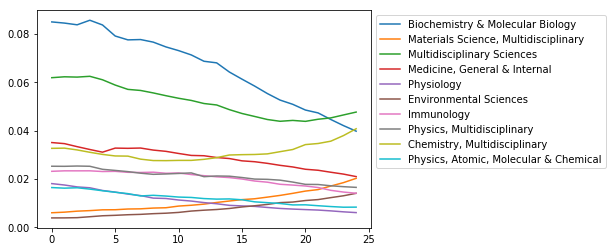

In [33]:
top_citation_change = combined.groupby('cat').apply(lambda grp: abs(grp.citations.iloc[-1]-grp.citations.iloc[0])).sort_values(ascending=False)
fig,ax = plt.subplots(1,1)
for c in top_citation_change.index[:10]:
    ax.plot(combined[combined.cat==c].citations,label=c)
ax.legend(bbox_to_anchor=(1,1))

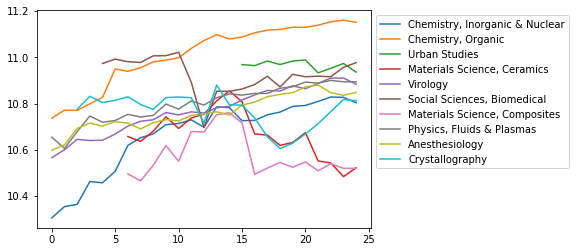

In [151]:
top_ent_change = combined.groupby('cat').apply(lambda grp: grp.ent.max()-grp.ent.min()).sort_values(ascending=False)
fig,ax = plt.subplots(1,1)
for c in top_ent_change.index[:10]:
    ax.plot(combined[combined.cat==c].ent,label=c)
ax.legend(bbox_to_anchor=(1,1))


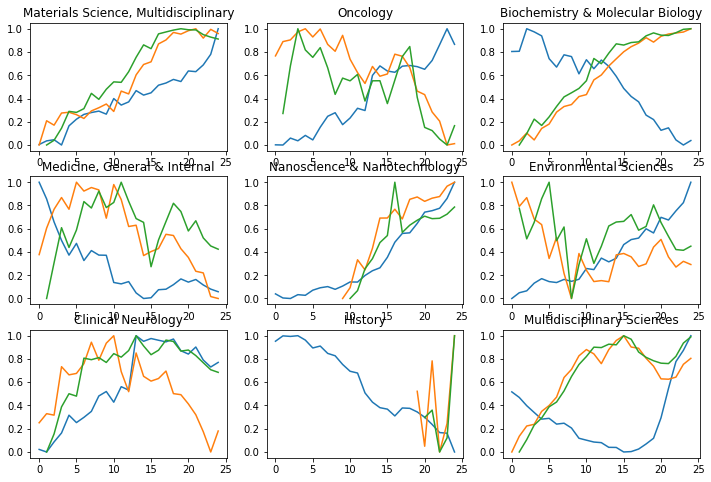

In [173]:
fig,axes = plt.subplots(3,3,figsize=(12,8))
for c,ax in zip(top_pub_change.index[:9],axes.flat):
    pubs = combined[combined.cat==c].pubs
    ax.plot((pubs-pubs.min())/(pubs.max()-pubs.min()))
    ent = combined[combined.cat==c].ent
    jsd = combined[combined.cat==c].jsd
    ax.plot((ent-ent.min())/(ent.max()-ent.min()))
    ax.plot((jsd-jsd.min())/(jsd.max()-jsd.min()))
    #ax2 = ax.twinx()
    #ax2.plot(ent,c=colors[1])
    ax.set_title(c)

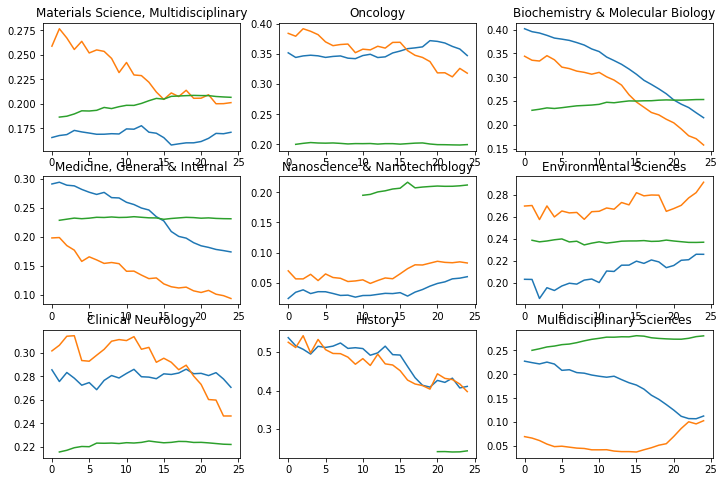

In [174]:
fig,axes = plt.subplots(3,3,figsize=(12,8))
for c,ax in zip(top_pub_change.index[:9],axes.flat):
    ins_in = combined[combined.cat==c].insularity_in
    ins_out = combined[combined.cat==c].insularity_out
    ent = combined[combined.cat==c].ent
    jsd = combined[combined.cat==c].jsd
    ax.plot(ins_out)
    ax.plot(ins_in)
    ax.plot(jsd)
#     ax2 = ax.twinx()
#     ax2.plot(ent,c='green')
    ax.set_title(c)

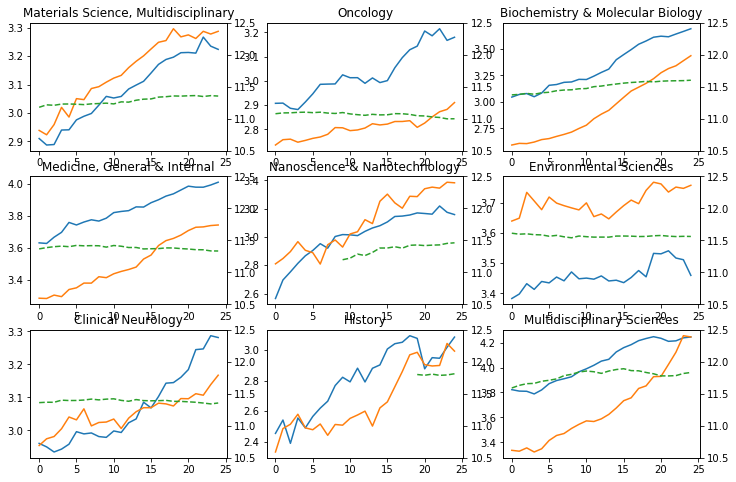

In [177]:
fig,axes = plt.subplots(3,3,figsize=(12,8))
for c,ax in zip(top_pub_change.index[:9],axes.flat):
    chin = combined[combined.cat==c].cHin
    chout = combined[combined.cat==c].cHout
    ent = combined[combined.cat==c].ent
    jsd = combined[combined.cat==c].jsd
    ax.plot(chin)
    ax.plot(chout)
    ax2 = ax.twinx()
    ax2.plot(ent,c=colors[2],ls='--')
    ax2.set_ylim(10.5,12.5)
    #ax.set_ylim(2.5,4)
    ax.set_title(c)

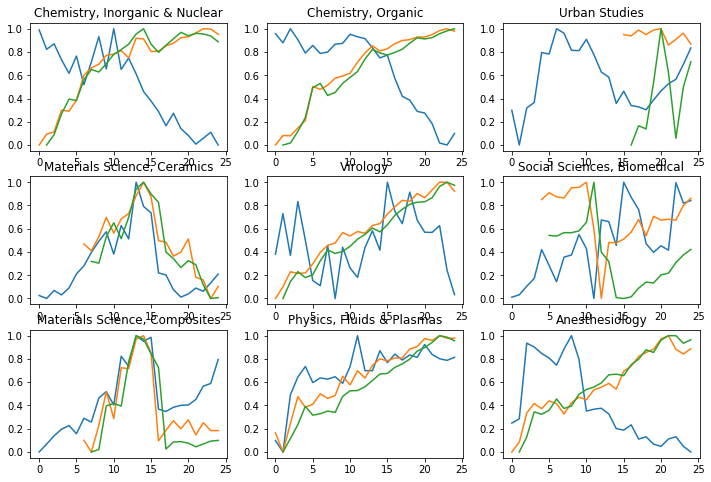

In [152]:
fig,axes = plt.subplots(3,3,figsize=(12,8))
for c,ax in zip(top_ent_change.index[:9],axes.flat):
    pubs = combined[combined.cat==c].pubs
    ax.plot((pubs-pubs.min())/(pubs.max()-pubs.min()))
    ent = combined[combined.cat==c].ent
    jsd = combined[combined.cat==c].jsd
    ax.plot((ent-ent.min())/(ent.max()-ent.min()))
    ax.plot((jsd-jsd.min())/(jsd.max()-jsd.min()))
    #ax2 = ax.twinx()
    #ax2.plot(ent,c=colors[1])
    ax.set_title(c)

In [126]:
x=combined.groupby('cat').mean()
#.plot(kind='scatter',x='jsd',y='insularity_in')
mask = ~pd.isnull(x.jsd)
pearsonr(x.jsd.dropna(),x.insularity_in[mask])

(-0.066497995509016611, 0.32398756063376699)

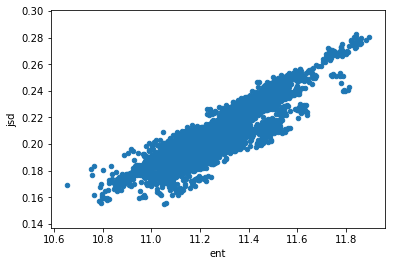

In [199]:
combined.plot(kind='scatter',x='ent',y='jsd')

In [82]:
combined.head()

,ent,jsd,year,cat,citations,pubs,insularity_out,insularity_in,cHin,cHout
0,11.611625,NaN,1991,Environmental Sciences,0.003872,0.011310,0.203408,0.269749,3.383197,3.639216
1,11.596743,0.238756,1992,Environmental Sciences,0.003886,0.011906,0.203292,0.270229,3.397948,3.648734
2,11.602146,0.237329,1993,Environmental Sciences,0.003975,0.012103,0.186027,0.257501,3.432132,3.734057
3,11.588973,0.238098,1994,Environmental Sciences,0.004364,0.012897,0.195790,0.269853,3.413343,3.705705
4,11.585545,0.239198,1995,Environmental Sciences,0.004761,0.013364,0.193285,0.259873,3.439472,3.676835


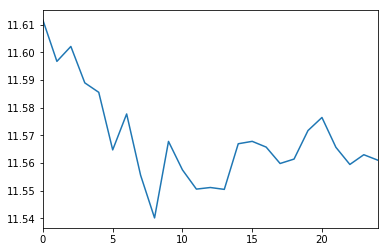

In [83]:
combined[combined.cat=='Environmental Sciences'].ent.plot()